## Perth Basin Case Study using Loop2Flopy

In [2]:
import numpy as np
import pandas as pd
import numbers

### Importing Borehole Data

In [3]:
bore_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "bore_info")
strat_info = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "strat_info")
bore_info

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.0,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.0,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.0,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.0,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.0,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,387523.0,6403674.0,PRAMS Formation Picks,AM65,2.0,9,57,-,-,-,...,-,69,188,208,-,-,-,-,-,363
408,403632.0,6402890.0,PRAMS Formation Picks,AM69,41.0,2,-,-,-,-,...,-,-,60,-,-,-,-,-,-,417
409,382835.0,6402182.0,PRAMS Formation Picks,AM67,11.0,21,44,-,-,-,...,-,96,186,246,-,-,-,-,-,375
410,390782.0,6398413.0,PRAMS Formation Picks,AM68,9.0,8,58,-,-,-,...,-,80,176,203,287,-,-,-,-,327


### Filter data
Crop to desired area and delete columns of less than 2 data points

In [4]:
df = bore_info.copy()
x0, x1, y0, y1, z0, z1 = 355000, 402000, 6522000, 6534000, -1200, 200 
#x0, x1, y0, y1, z0, z1 = 355000, 390000, 6527000, 6537000, -1200, 200 # Whole Block
df = df.loc[(df['Northing'] >= y0)] 
df = df.loc[(df['Northing'] <= y1)]
#df = df.loc[(df['Easting'] <= x1)]
df = df.drop(['Source'], axis=1)
#df = df.drop(['Tr','Tkm', 'Tk','Tkc','Jc','Kcom','Kps','Kpo','Kpc','Kcoh','Kcp'], axis=1)
# I think we need to keep this general so that we can apply it everywhere...
df = df.reset_index(drop=True)

df

,Easting,Northing,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,Kcl,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,373194.0,6533955.0,GB3,31.00,34,-,-,-,-,-,...,40,235,360,376,405,-,-,-,719,-
1,407026.0,6533780.0,PER,185.00,-,-,-,-,-,-,...,157,-,-,-,-,-,-,-,-,-
2,396819.0,6533529.0,CHER1,105.00,1,-,-,-,-,-,...,-,135,-,-,-,-,-,-,-,-
3,366379.0,6533124.0,GB2,58.00,46,-,-,-,-,-,...,97,152,168,-,-,-,-,-,509,-
4,399706.0,6532768.0,MBRK,105.00,5,-,-,-,-,-,...,134,-,-,-,-,-,-,-,-,-
5,396339.0,6532249.0,GG75,115.00,-,-,-,-,-,-,...,110,171,-,-,-,275,-,-,-,-
6,384139.0,6532149.0,SN786,135.00,-,-,-,-,-,-,...,81,135,-,-,-,-,-,-,-,-
7,356924.0,6531829.0,AM1,53.00,99,-,-,-,-,157,...,222,499,505,517,-,680,-,-,-,-
8,396539.0,6531749.0,GG85,100.00,-,-,-,-,-,-,...,79,-,-,-,-,-,-,-,-,-
9,395149.0,6531407.0,GB5,103.00,2,-,-,-,-,-,...,18,82,-,-,-,380,451,514,517,-


<bound method NDFrame.keys of      Easting   Northing     ID  Ground  TQ Tr Tkm   Tk Tkc  Kcl  ... Kwlp  \
0   373194.0  6533955.0    GB3   31.00  34  -   -    -   -    -  ...   40   
1   407026.0  6533780.0    PER  185.00   -  -   -    -   -    -  ...  157   
2   396819.0  6533529.0  CHER1  105.00   1  -   -    -   -    -  ...    -   
3   366379.0  6533124.0    GB2   58.00  46  -   -    -   -    -  ...   97   
4   399706.0  6532768.0   MBRK  105.00   5  -   -    -   -    -  ...  134   
5   396339.0  6532249.0   GG75  115.00   -  -   -    -   -    -  ...  110   
6   384139.0  6532149.0  SN786  135.00   -  -   -    -   -    -  ...   81   
7   356924.0  6531829.0    AM1   53.00  99  -   -    -   -  157  ...  222   
8   396539.0  6531749.0   GG85  100.00   -  -   -    -   -    -  ...   79   
9   395149.0  6531407.0    GB5  103.00   2  -   -    -   -    -  ...   18   
10  401021.0  6531105.0   MCK1  127.00   5  -   -    -   -    -  ...  180   
11  401258.0  6530836.0    GB1  117.00  14  - 

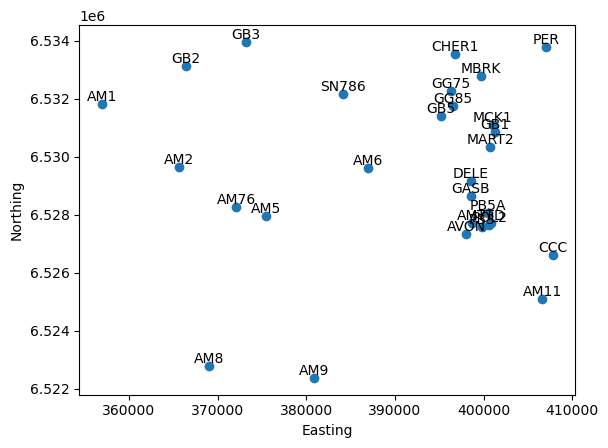

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

print(df.keys)

# Plan of data points
plt.scatter(df.Easting, df.Northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
i = 0
for (xi, yi) in zip(df.Easting, df.Northing):
    plt.text(xi, yi, df.ID[i], va='bottom', ha='center')
    i += 1
#plt.plot([fx1, fx2], [fy1, fy2])
#plt.plot(fault_center[0], fault_center[1], 'o')
#plt.xlim(x0,x1)
#plt.ylim(y0,y1)

In [6]:
lithcodes = list(df.columns.values[3:])         # Make a list of formations  
df.Easting = pd.to_numeric(df.Easting)
df.Northing = pd.to_numeric(df.Northing)
df.Ground = pd.to_numeric(df.Ground)
print(lithcodes)

['Ground', 'TQ', 'Tr', 'Tkm', 'Tk', 'Tkc', 'Kcl', 'Kcp', 'Kcg', 'Kcm', 'Kcom', 'Kcok', 'Kcoh', 'Kwlp', 'Kwlw', 'Kwlm', 'Kws', 'Kwg', 'Kpc', 'Kps', 'Kpo', 'Jy', 'Jc']


In [7]:
strat = []
vdum = [38,
        -10,
        -52,
        -124,
        -320,
        -385,
        -435,
        -463,
        -472,
        -494,
        -549,
        -591,
        -619,
        -666,
        -822,
        -881,
        -963,
        -1043,
        -1818,
        -2090,
        -2148,
        -3148,
        -4148]

for i, lith in enumerate(lithcodes):
    index = i
    lithid = i-1
    val = vdum[i]
    sequence = strat_info.loc[strat_info['unit'] == lith, 'sequence'].item()
    R = strat_info.loc[strat_info['unit'] == lith, 'R'].item()/255
    G = strat_info.loc[strat_info['unit'] == lith, 'G'].item()/255
    B = strat_info.loc[strat_info['unit'] == lith, 'B'].item()/255
    strat.append([index, lithid, lith, sequence, val, [round(R,2),round(G,2),round(B,2)]])
strat = pd.DataFrame(strat)
strat.columns =['index','lithid','lithcode','sequences','vals','color']
strat

,index,lithid,lithcode,sequences,vals,color
0,0,-1,Ground,Quaternary,38,"[1.0, 1.0, 1.0]"
1,1,0,TQ,Quaternary,-10,"[1.0, 1.0, 0.0]"
2,2,1,Tr,Tertiary,-52,"[0.73, 0.6, 0.58]"
3,3,2,Tkm,Tertiary,-124,"[1.0, 0.6, 0.2]"
4,4,3,Tk,Tertiary,-320,"[1.12, 0.32, 0.16]"
5,5,4,Tkc,Tertiary,-385,"[1.0, 0.6, 0.2]"
6,6,5,Kcl,Coolyena,-435,"[0.67, 0.8, 0.0]"
7,7,6,Kcp,Coolyena,-463,"[0.77, 0.84, 0.61]"
8,8,7,Kcg,Coolyena,-472,"[0.67, 0.85, 0.6]"
9,9,8,Kcm,Coolyena,-494,"[0.67, 0.78, 0.71]"


### Make lithology table for Loop

In [18]:
#Okay, let me vocalise, or type, what is in my mind...
# So we treat the four parts as their own thing...
# then we make the unconformities feature names....
#Also, on the phone with JP, he said the last number is the end of hole (EOH) 


data_list = df.values.tolist()             # Turn data into a list of lists
formatted_data = []
for i in range(len(data_list)): #iterate for each row
    end = False
    # okay, first we will establish the max value (i.e. the end of the hole)
    stuff = []
    for j in range(3,25,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            stuff.append(data_list[i][j])
            
    EOH = max(stuff)
    print(EOH)
        
    boreid = data_list[i][2]
    easting, northing = data_list[i][0], data_list[i][1]
    groundlevel = data_list[i][3]    
    # First channp.nan, np.nan, np.nange - we can get the norms from the geophys data...
    gx, gy, gz =0., 0.,1.
        
    # Add data for groundlevel
    val = strat.vals[0]
    formatted_data.append([boreid, easting, northing, groundlevel, val, 'Ground', 'Quaternary', gx, gy, gz]) #eventually we cn get this from a dem...
    current_bottom = np.copy(groundlevel)
    
    #okay... lets see if the TQ boundary exists... 
    # JP question - Say in SN786, how you have logged it, do you mean the Pinjar is at the surface?
    #thought 2 - we will just have a DEM eventaully I imagine... so ground could be an unconformity if we have something other than TQ at the surface?
    # but in the current framework:
    if isinstance(data_list[i][4], numbers.Number) == True:
        bottom    = groundlevel - float(data_list[i][4])  # Ground surface - TQ (mbgl)
        val       = strat.vals[1]                      # designated isovalue
        lithid    = lithcodes[1]                       # lithology id 
        feat_name = strat.sequences[1]                 # sequence name
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])
        current_bottom = np.copy(bottom)
    
    # I know, I know, there isn't any of the tertiary one here, but in being thorough...
    
    for j in range(5,9,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue
                end = True
                                          
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)

                                   
    # Teriary unconformity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Tert_base'
        feat_name = 'Tertiary_unconformity'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])
                                          
    # Fighting, out of the perth Basin by way of San Jose Calfornia: The Coolyeena Formation!!!!
    
    for j in range(9,16,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom)  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)                                          
                                          
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.  
        lithid = 'Cool_base'
        feat_name = 'CoolUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])     
                                          
    for j in range(16,21,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)  
    # Unconfiormity
    if end == False:
        bottom    = np.copy(current_bottom)
        val = 0.
        lithid = 'Warn_base'
        feat_name = 'WarnUC'
        formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, 0., 0., 1.])  
        
    gx, gy, gz = 0., 0., 1.
    for j in range(21,26,1):
        if isinstance(data_list[i][j], numbers.Number) == True:
            if data_list[i][j] < EOH:
                bottom    = groundlevel -float(data_list[i][j])  # Ground surface - TQ (mbgl)
                val       = strat.vals[j-3]                      # designated isovalue
            else:
                bottom    = np.copy(current_bottom) # Ground surface - TQ (mbgl)
                val       = strat.vals[j-4]                      # designated isovalue     
                end = True
            lithid    = lithcodes[j-3 ]                       # lithology id 
            feat_name = strat.sequences[j-3]                 # sequence name
            formatted_data.append([boreid, easting, northing, bottom, val, lithid, feat_name, gx, gy, gz])    
            current_bottom = np.copy(bottom)  

data = pd.DataFrame(formatted_data)
data.columns =['ID','X','Y','Z','val','lithcode','feature_name', 'gx', 'gy', 'gz']
#The Bado
xf = [373786, 373439]
yf = [6528191,6517059]
zf = [-200,-500]

for lith in lithcodes:
    filtered_df = data[data.lithcode == lith] 
    print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Tert_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Cool_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])
filtered_df = data[data.lithcode == 'Warn_base'] 
print('\n Lithology = ', lith, '\n\n', filtered_df[['ID','X','Y','Z','val','lithcode','feature_name',  'gx', 'gy', 'gz']])

719
185.0
135
509
134
275
135.0
680
100.0
517
270
316
188
881
300
254
189
647
317
302
721
180
267
171
231
244
810
810
303


IndexError: list index out of range

In [17]:
data[len(data)-8:]

,ID,X,Y,Z,val,lithcode,feature_name,gx,gy,gz,nx,ny,nz
258,fault_0,373786.0,6528191.0,-200,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
259,fault_1,373786.0,6528191.0,-300,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
260,fault_2,373786.0,6528191.0,-400,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
261,fault_3,373786.0,6528191.0,-500,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
262,fault_4,373439.0,6517059.0,-200,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
263,fault_5,373439.0,6517059.0,-300,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
264,fault_6,373439.0,6517059.0,-400,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0
265,fault_7,373439.0,6517059.0,-500,0.0,bmini,Badaminna_Fault,0.0,0.0,0.0,1.0,0.0,0.0


### Create Geomodel

In [10]:
from LoopStructural import GeologicalModel
origin  = (x0, y0, z0)
maximum = (x1, y1, z1)
geomodel = GeologicalModel(origin, maximum)
geomodel.data = data


### Add surfaces

In [11]:
Quaternary = geomodel.create_and_add_foliation("Quaternary", nelements=1e4)
#QuatUC     = geomodel.add_unconformity(Quaternary, strat.vals[1]) # Clips above #(UC0)

Coolyena = geomodel.create_and_add_foliation("Coolyena",nelements=1e4)

CoolUC   = geomodel.create_and_add_foliation("CoolUC",nelements=1e4)

Warnbro = geomodel.create_and_add_foliation("Warnbro",nelements=1e4)

WarnUC = geomodel.create_and_add_foliation("WarnUC",nelements=1e4)

Yarragadee = geomodel.create_and_add_foliation("Yarragadee",nelements=1e4)

geomodel.update()


print(data.feature_name.unique())

Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region


  0%|          | 0/6 [00:00<?, ?it/s]

['Quaternary' 'Tertiary_unconformity' 'CoolUC' 'Warnbro' 'WarnUC'
 'Yarragadee' 'Coolyena' 'Tertiary']


### Add Stratigraphy Column

### 2D View

In [14]:
y_transects = [6505000, 6514000, 6528279]
delx, delz = 100, 100
x, z = np.linspace(x0,x1,delx), np.linspace(z0,z1,delz)
xx, zz = np.meshgrid(x,z)
yy = np.zeros_like(xx)
yy[:] = 6529649.0
#X_sect = geomodel.evaluate_model(np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals1 = geomodel.evaluate_feature_value("Quaternary",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals2 = geomodel.evaluate_feature_value("Coolyena",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals3 = geomodel.evaluate_feature_value("CoolUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals4 = geomodel.evaluate_feature_value("Warnbro",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals5 = geomodel.evaluate_feature_value("WarnUC",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))
vals6 = geomodel.evaluate_feature_value("Yarragadee",np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T).reshape(np.shape(xx))

#plt.imshow(vals2)

dum = np.ones_like(vals4)*-10000
dum[vals5<0] = vals6[vals5<0]
dum[vals5>0] = vals4[vals5>0]
dum[vals3>0] = vals2[vals3>0]
dum[vals1>-10] = vals1[vals1>-10]

Lith = np.zeros_like(dum)
for i in range(len(vdum)-2,-1,-1):
    Lith[dum>vdum[i]] = i


Text(0, 0.5, 'z mAHD)')

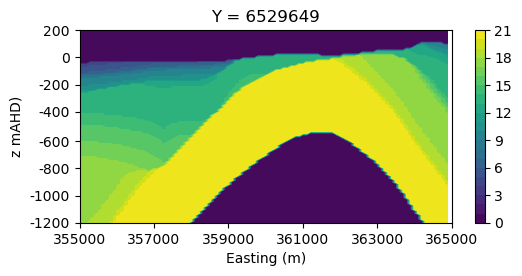

In [15]:
#plt.imshow(Lith,origin = 'lower')
plt.figure(figsize=(6,2.5))
plt.contourf(Lith,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.colorbar()
plt.title("Y = 6529649")
plt.xticks([0,20,40,60,80,100],[x0,x0+2000,x0+4000,x0+6000,x0 + 8000, x0 + 10000])
plt.xlabel('Easting (m)')
yticks  = []
yvals = [-1200,-1000,-800,-600,-400,-200,0,200]
for ydum in yvals:
    n = np.argmin(abs(ydum-z))
    yticks.append(n)
plt.yticks(yticks,yvals)
plt.ylabel('z mAHD)')